# Jupyter notebook usage

We're going to use Jupyter notebooks both for demos, and for the coursework. Jupyter notebooks are comprised of a series of *cells*. Cells have different "types": most cells are code cells, but this cell is a markdown cell, which contains formatted text.

Run a code cell by pressing `shift`+`enter`.

Make sure to run all cells in order, top-to-bottom!

In [1]:
# import everything we will want up front!

import numpy as np
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt
%matplotlib inline

## Numpy usage

Numpy is an array library. It supports most common linear algebra operations. It also has some basic random number generation.

Documentation is available [https://numpy.org/doc/stable/].

In [2]:
A = np.array([[1., 2.],
              [0., 3.],
              [4., 1.]])

b = np.array([0.5, -1])

print(A.shape, b.shape)

(3, 2) (2,)


In [3]:
# elementwise multiplication
print(A * A)

[[ 1.  4.]
 [ 0.  9.]
 [16.  1.]]


In [4]:
# transpose
print(A.T)

[[1. 0. 4.]
 [2. 3. 1.]]


In [5]:
# matrix-vector multiplication
print("A @ b:\n", A @ b)
print("A @ A.T:\n", A @ A.T)

A @ b:
 [-1.5 -3.   1. ]
A @ A.T:
 [[ 5.  6.  6.]
 [ 6.  9.  3.]
 [ 6.  3. 17.]]


When indexing, you can use `:` as a wildcard, or to specify a range. Negative indices count from the end.

In [6]:
# indexing
print("A[0,1] =", A[0,1])
print("First row of A = ", A[0,:])
print("Second column of A = ", A[:,1])
print("Second column of A, excluding the last value = ", A[:-1,1])

A[0,1] = 2.0
First row of A =  [1. 2.]
Second column of A =  [2. 3. 1.]
Second column of A, excluding the last value =  [2. 3.]


In [7]:
# evenly spaced points from zero to one
points = np.linspace(0, 1, 100)
points[3:15] # grab a range

array([0.03030303, 0.04040404, 0.05050505, 0.06060606, 0.07070707,
       0.08080808, 0.09090909, 0.1010101 , 0.11111111, 0.12121212,
       0.13131313, 0.14141414])

In [8]:
# there are also useful aggregation tools:
print(A.sum())
print(A.sum(0)) # Sum out axis 0
print(A.sum(1)) # Sum out axis 1
print(A.sum(-1)) # Sum out "last" axis
print(A.mean(-1)) # Average instead of sum, etc

11.0
[5. 6.]
[3. 3. 5.]
[3. 3. 5.]
[1.5 1.5 2.5]


### One surprising and useful thing is "broadcasting".

This is a very useful feature: if you have arrays with dimensions of size one, but the rest of the dimensions match up, then elementwise operations will "just work". It will add across all the other rows/columns automatically.

"Missing" leading (i.e. left-most) dimensions are treated as having size one automatically.

In [9]:
A + b # A.shape == (3, 2), b.shape == (2, )

array([[1.5, 1. ],
       [0.5, 2. ],
       [4.5, 0. ]])

In [10]:
A.T + b # this doesn't work -- shapes don't line up

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [11]:
# You can explicitly insert dimensions of size one like this:
print("b.shape:", b.shape)
print("b[:,None].shape:", b[:,None].shape)

print("\nb =", b)
print("\nb[:,None].T =", b[:,None].T)
print("\nb[None,:] =", b[None,:])

A.T + b[:,None]

b.shape: (2,)
b[:,None].shape: (2, 1)

b = [ 0.5 -1. ]

b[:,None].T = [[ 0.5 -1. ]]

b[None,:] = [[ 0.5 -1. ]]


array([[1.5, 0.5, 4.5],
       [1. , 2. , 0. ]])

Numpy also includes many common operations in vectorized versions. See the documentation for more.

Vectorized operations are much faster than using python loops!

In [12]:
(np.log( 1 + np.exp(A)), 
 np.sqrt(b**2))

(array([[1.31326169, 2.12692801],
        [0.69314718, 3.04858735],
        [4.01814993, 1.31326169]]),
 array([0.5, 1. ]))

There are a bunch of useful constructors for creating matrices: 

* `np.eye` for identity
* `np.zeros` for all-zeros
* `np.ones` for all ones
* `np.arange` for ranges

etc.

You can also directly edit individual entries of matrices (but try to use vectorized options where possible).

In [13]:
M = np.eye(3)
M[:,1] = np.arange(2,5)
M[0,0] = -5
print("M:\n", M)

M:
 [[-5.  2.  0.]
 [ 0.  3.  0.]
 [ 0.  4.  1.]]


## Pytorch

Pytorch [https://pytorch.org] is an automatic differentiation and deep learning toolkit. For now, we are just going to deal with its array implementation, and its probability distributions library.

Syntax is designed to be in general very similar to Numpy.

In [14]:
# you can create tensors from numpy arrays.
# by default, these are lower precision!
C = torch.Tensor(A)
d = torch.Tensor(b)
C, d

(tensor([[1., 2.],
         [0., 3.],
         [4., 1.]]),
 tensor([ 0.5000, -1.0000]))

In [15]:
# most operations are similar
print("numpy:  ", (A @ b - A.T).sum(-1))
print("pytorch:", (C @ d - C.T).sum(-1)) # etc

numpy:   [-8.5 -9.5]
pytorch: tensor([-8.5000, -9.5000])


In [16]:
# pytorch generally supports an alternate syntax:
print(torch.exp(d))
print(d.exp())

tensor([1.6487, 0.3679])
tensor([1.6487, 0.3679])


Mixing and matching pytorch tensors and numpy arrays sometimes works fine, but sometimes fails. Try to avoid it. You can cast a pytorch tensor to a numpy array using `.numpy()`.

In [17]:
print(C + A) # returns a "float64" torch tensor

tensor([[2., 4.],
        [0., 6.],
        [8., 2.]], dtype=torch.float64)


In [18]:
print(C + torch.Tensor(A)) # returns a "float32" torch tensor

tensor([[2., 4.],
        [0., 6.],
        [8., 2.]])


In [19]:
print(A + C) # throws an exception

TypeError: unsupported operand type(s) for +: 'numpy.ndarray' and 'Tensor'

In [20]:
print(A + C.numpy()) # returns a numpy array

[[2. 4.]
 [0. 6.]
 [8. 2.]]


## Distributions and plotting

Pytorch includes a very useful distributions library, in `torch.distributions`. It includes most common probability distributions we might be interested in as primitives. We've imported it here as `dist`.

The most immediately useful methods that distributions have are `.sample` and `.log_prob`. We'll also discuss `.rsample` later.

We'll also show how to use **matplotlib** [https://matplotlib.org] to plot densities, histograms, and samples. Matplotlib prefers numpy arrays as inputs, rather than torch tensors, but the basic plotting scripts will work either way.

In [21]:
standard_normal = dist.Normal(1, 3)
rv = standard_normal.sample((100, 2))
print(rv.shape)

torch.Size([100, 2])


In [22]:
# should be close to (1, 3).
# Also, note that `.item()` returns a python scalar!
rv.mean(), rv.std().item() 

(tensor(0.9270), 2.6264946460723877)

Using matplotlib to plot the probability density

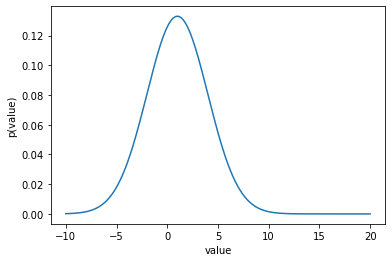

In [23]:
domain = torch.linspace(-10, 20, 1000)

plt.plot(domain, standard_normal.log_prob(domain).exp());
plt.xlabel("value")
plt.ylabel("p(value)");

Plotting a histogram

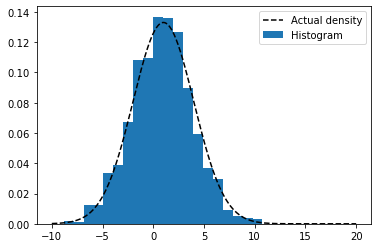

In [24]:
plt.hist(standard_normal.sample((1000,)).numpy(), bins=20, density=True, label="Histogram");
plt.plot(domain, standard_normal.log_prob(domain).exp(), 'k--', label="Actual density");
plt.legend();

We'll demo the use of the distributions library more in the next notebook.